In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

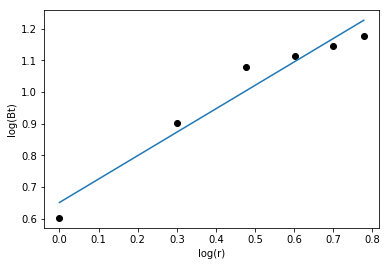

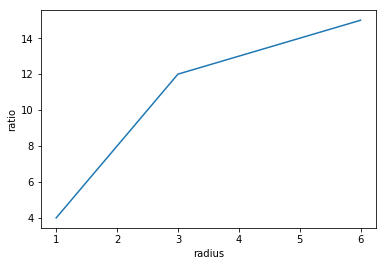

0.7404415130152151


In [12]:
"""
Code die de fractal dimension (of radial dimension) bepaalt van een matrix M
Verbeterpunten: 
-code bekijkt nu telkens naar vierkanten, cirkels is mis beter
-code maakt nu alleen onderscheid tussen 'vacant' en 'niet vacant', maar nog niet tussen de verschillende soorten bebouwing 
(commerce, industrie, huizen)
"""

# V, H, I, C
# 0, 1, 2, 3

vacant_count = 0 
houses_count = 0
industry_count = 0
commerce_count = 0

N = 20
M = np.zeros((N, N))

M[7, 4] = 1
M[7, 5] = 1
M[7, 6] = 1
M[7, 7] = 1
M[7, 8] = 1
M[8, 8] = 1
M[9, 8] = 1
M[9, 9] = 1
M[9, 10] = 1
M[10, 9] = 1
M[10, 10] = 1
M[10, 11] = 1
M[10, 12] = 1
M[11, 11] = 1
M[11, 12] = 1
print(M)

list_radius = []
list_number_occupied_cells = []
list_number_houses_cells = []
list_number_industry_cells = []
list_number_commerce_cells = []

# Bekijk telkens een vierkant gebied en tel het aantal bezette cellen
# Elke tijdstap neemt de grootte van het gebied toe
# radius is hier de halve lengte van het vierkant waar je naar kijkt
for length in range(2, N, 2):
    radius = length/2
    print(" NIEUWE RADIUS ----------------------", radius)
    left_index = math.ceil((N-length)/2)
    right_index = left_index + length - 1
    
    number_occupied_cells = 0
    number_vacant = 0 
    number_houses = 0
    number_industry = 0
    number_commerce = 0
    
#   voor het stuk wat je gaat berekenen
    for i in range(left_index, right_index+1):
        for j in range(left_index, right_index+1):
            if M[i, j] != 0:
                number_occupied_cells += 1
                
                print("houses voor berekenen", number_houses)
                number_houses, number_industry, number_commerce = ratio_calculator(M[i,j], number_houses, number_industry, number_commerce)
                print("houses na berekenen", number_houses)
                
    
    # Vergelijk het aantal bezette cellen van de huidige tijdstap met het aantal bezette cellen van de vorige tijdstap
    # Als ze niet gelijk zijn -> voeg waardes (radius, aantal bezette cellen) toe aan de lijsten
    if len(list_number_occupied_cells) == 0:
        list_radius.append(radius)
        list_number_occupied_cells.append(number_occupied_cells)
        list_number_houses_cells.append(number_houses)
        list_number_industry_cells.append(number_industry)
        list_number_commerce_cells.append(number_commerce)
    else:
        if number_occupied_cells != list_number_occupied_cells[-1]:
            list_radius.append(radius)
            list_number_occupied_cells.append(number_occupied_cells)
            list_number_houses_cells.append(number_houses)
            list_number_industry_cells.append(number_industry)
            list_number_commerce_cells.append(number_commerce)

            
print("RADIUS LIST", list_radius)
print("housing list", list_number_houses_cells)
# print(list_number_occupied_cells)

# Neem de log waardes van de radius en het aantal bezette cellen
list_radius_log = [math.log10(i) for i in list_radius]
list_number_occupied_cells_log = [math.log10(i) for i in list_number_occupied_cells]

print(list_radius_log)
print(list_number_occupied_cells_log)

# Linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(list_radius_log, list_number_occupied_cells_log)
list_fitted_data = [slope * i + intercept for i in list_radius_log]

# Plot data
plt.plot(list_radius_log, list_number_occupied_cells_log, 'ko')
plt.plot(list_radius_log, list_fitted_data)
plt.xlabel("log(r)")
plt.ylabel("log(Bt)")
plt.show()

# plot radius vs ratios
# plt.plot(list_radius_log, list_number_occupied_cells_log, 'ko')
plt.plot(list_radius, list_number_houses_cells ,list_number_industry_cells, list_number_commerce_cells)
plt.xlabel("radius")
plt.ylabel("ratio")
plt.show()


# print("RADIUS LIST", list_radius)
# print("housing list", list_number_houses_cells)

# Fractal dimension (of radial dimension) is gelijk aan de helling van de gefitte curve
fractal_dimension = slope
print(fractal_dimension)


In [5]:
def ratio_calculator(occupied_cel, number_houses, number_industry, number_commerce):
    
    if occupied_cel == 1:
        number_houses += 1
    if occupied_cel == 2:
        number_industry += 1
    if occupied_cel == 3:
        number_commerce += 1
        
    return number_houses, number_industry, number_commerce    